In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Bureau Balance

In [2]:
bb = pd.read_csv('.././data/bureau_balance.csv')
bb.sample(10)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
2616700,5836788,-43,C
781458,6019618,-3,X
16556073,6765427,-24,C
12022099,5317469,-8,C
6010452,6089826,-91,0
9273751,5089632,-20,0
15964263,5067285,-9,X
1463031,5798293,-13,C
5163126,6539436,-2,C
13902486,5120557,-18,C


In [3]:
print(bb.isna().sum())
print(f'\nDuplicated values:{bb.duplicated().sum()}')

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

 Duplicated values:0


## Bureau

In [4]:
bureau = pd.read_csv('.././data/bureau.csv')
display(bureau.sample(10))
print(f'\n{bureau.info()}')

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
1238875,397389,5918371,Active,currency 1,-1142,0,NaN,NaN,NaN,0,112500.000,NaN,NaN,0.0,Credit card,-816,0.0
1636725,162438,5765083,Closed,currency 1,-1056,0,39.0,-233.0,NaN,0,900000.000,0.00,0.0,0.0,Consumer credit,-209,0.0
1593880,156720,5594153,Active,currency 1,-619,0,31164.0,NaN,NaN,0,2250.000,2164.50,NaN,0.0,Credit card,-1,NaN
963899,139338,6759711,Closed,currency 1,-453,0,-89.0,-333.0,NaN,0,67446.000,0.00,0.0,0.0,Consumer credit,-331,0.0
1185526,182092,5527969,Closed,currency 1,-1468,0,-919.0,-919.0,NaN,0,124038.000,0.00,0.0,0.0,Consumer credit,-748,NaN
888396,289602,5816520,Closed,currency 1,-1497,0,330.0,-767.0,NaN,0,454054.500,416034.00,NaN,0.0,Consumer credit,-767,0.0
655991,134706,6789525,Active,currency 1,-420,0,676.0,NaN,NaN,0,2245500.000,1622410.38,NaN,0.0,Consumer credit,-7,NaN
167905,100464,6367370,Closed,currency 1,-1542,0,NaN,-1094.0,0.0,0,0.000,0.00,0.0,0.0,Credit card,-523,18000.0
474078,110892,5106209,Closed,currency 1,-1610,0,-1456.0,-1451.0,NaN,0,22851.000,0.00,0.0,0.0,Consumer credit,-734,NaN
1355429,322859,5438675,Closed,currency 1,-668,0,-517.0,-517.0,0.0,0,22273.155,0.00,0.0,0.0,Consumer credit,-513,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB

None


In [15]:
# function to plot missing value percentage
def plot_missing_percentage(df):
    """
    Plot the percentage of missing values for each column in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to process.
    """
    # Calculate the percentage of missing values
    missing = (df.isnull().sum() / len(df)) * 100

    # Create a DataFrame with the results
    percentage_missing = pd.DataFrame({'column': df.columns, 'missing_percentage %': missing.values})
    percentage_missing['missing_percentage %'] = percentage_missing['missing_percentage %'].round(2)
    percentage_missing = percentage_missing.sort_values('missing_percentage %', ascending=False)
    percentage_missing = percentage_missing.reset_index()
    percentage_missing = percentage_missing.drop('index', axis=1)

    # Plot the results
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(x='missing_percentage %', y='column', data=percentage_missing, color='#E1341E')
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_width() + '%', xy=(p.get_width(), p.get_y()+p.get_height()/2),
                    xytext=(8, 0), textcoords='offset points', ha="left", va="center", fontsize=10)
    plt.title('Missing values Percentage for Each Column', fontsize=17, fontweight='bold')
    plt.ylabel('Kolom', fontsize=12)
    plt.xlabel('missing_percentage %', fontsize=12)
    plt.tight_layout()
    plt.xlim(0, 100)
    plt.show()

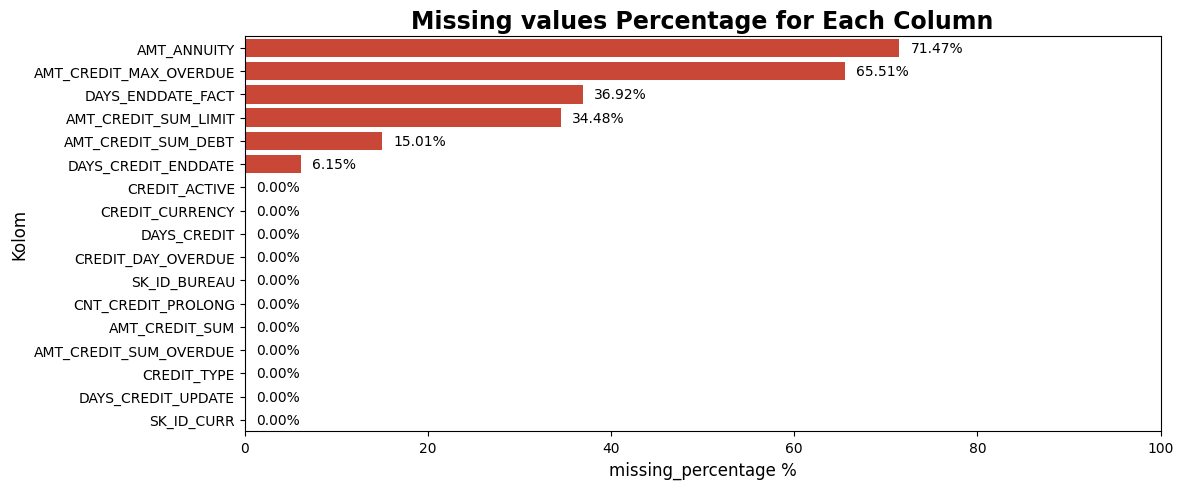

In [16]:
plot_missing_percentage(bureau)

In [9]:
# function to drop columns with missing values
def dropna(df, threshold=0.3):
    '''
    Drop columns from a DataFrame where the proprortion of missing values is greater than specified threshold.

    Parameters:
    df: The DataFrame to process
    threshold: The threshold proportion of missing vales. Columns with a proportion of missing values greater than this will be dropped.

    Returns:
    Pandas.DataFrame: The processed DataFrame. 
    '''
    for column in df.columns:
        missing_proportion = df[column].isnull().sum() / len(df)
        if missing_proportion > threshold:
            df = df.drop(column, axis=1)
    return df

bureaucl = dropna(bureau)

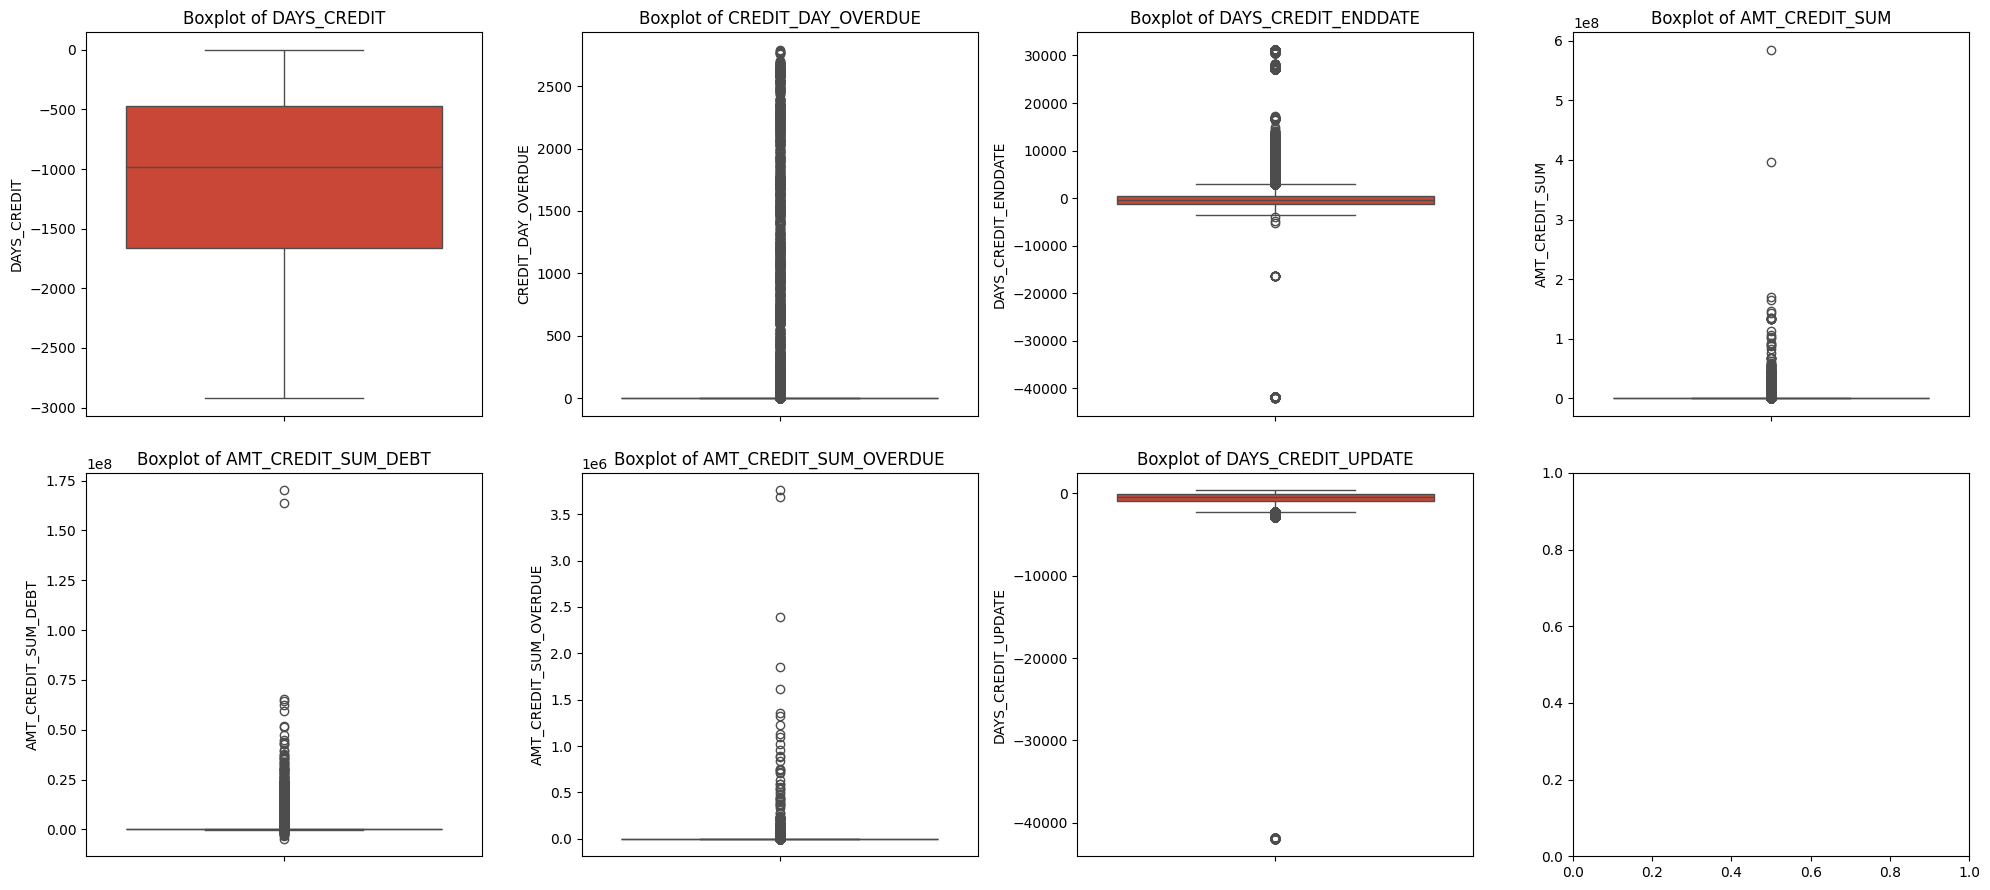

In [10]:
numbur = bureaucl.select_dtypes(include='number').drop(['SK_ID_CURR', 'SK_ID_BUREAU', 'CNT_CREDIT_PROLONG'], axis=1)

# Create boxplot for every numerical column
fig, ax = plt.subplots(2, 4, figsize=(20, 9))
ax = ax.flatten()
for i, col in enumerate(numbur.columns):
    sns.boxplot(y=numbur[col], ax=ax[i], color='#E1341E')
    ax[i].set_title(f'Boxplot of {col}')
plt.tight_layout()

In [12]:
bureaucl.isna().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE       105553
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                13
AMT_CREDIT_SUM_DEBT       257669
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
dtype: int64

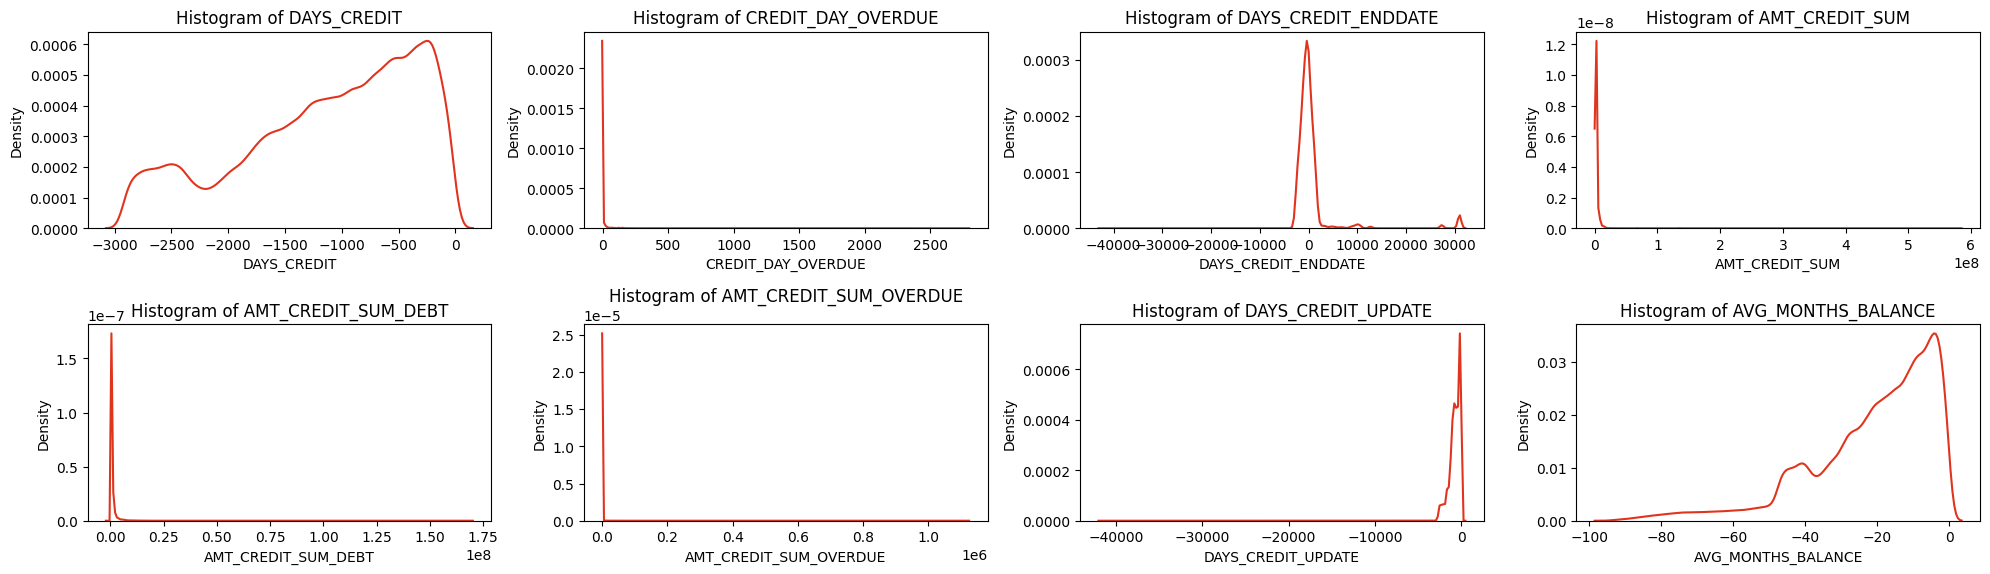

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(20, 6))
ax = ax.flatten()
for i, col in enumerate(numbur.columns):
    sns.kdeplot(numbur[col], ax=ax[i], color='#E1341E')
    ax[i].set_title(f'Histogram of {col}')

plt.tight_layout()

## Credit Card Balance

In [25]:
pd.set_option('display.max_columns', None)

In [26]:
ccb = pd.read_csv('.././data/credit_card_balance.csv')
display(ccb.sample(10))
display(ccb.info())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
3711586,2200089,228063,-8,280789.245,270000,0.0,0.0,0.0,0.0,13500.0,13500.000,13500.00,265436.865,278389.845,278389.845,0.0,0,0.0,0.0,27.0,Active,0,0
421129,1568442,163057,-23,67511.295,67500,0.0,0.0,0.0,0.0,3375.0,4500.000,4500.00,64849.860,67511.295,67511.295,0.0,0,0.0,0.0,47.0,Active,0,0
68025,2313131,267630,-19,0.000,135000,0.0,0.0,0.0,0.0,0.0,33.840,33.84,0.000,0.000,0.000,0.0,0,0.0,0.0,13.0,Active,0,0
2906224,1050018,331099,-52,0.000,0,0.0,0.0,0.0,0.0,0.0,1641.375,0.00,0.000,0.000,0.000,0.0,0,0.0,0.0,22.0,Active,0,0
2217297,1882214,353304,-5,0.000,67500,0.0,0.0,0.0,0.0,0.0,200.250,0.00,0.000,0.000,0.000,0.0,0,0.0,0.0,69.0,Active,0,0
2970499,1877945,139686,-52,0.000,0,0.0,0.0,0.0,0.0,0.0,400.995,0.00,0.000,0.000,0.000,0.0,0,0.0,0.0,8.0,Active,0,0
827782,2127650,405136,-3,0.000,45000,NaN,0.0,NaN,NaN,0.0,NaN,0.00,0.000,0.000,0.000,NaN,0,NaN,NaN,0.0,Active,0,0
3256028,1640161,191199,-15,0.000,157500,0.0,0.0,0.0,0.0,0.0,98.415,0.00,0.000,0.000,0.000,0.0,0,0.0,0.0,73.0,Active,0,0
789639,2582160,183133,-91,1802.655,67500,0.0,0.0,0.0,0.0,3375.0,6750.000,6750.00,1703.700,1802.655,1802.655,0.0,0,0.0,0.0,15.0,Active,0,0
3301877,2772591,159216,-95,0.000,67500,NaN,0.0,NaN,NaN,NaN,NaN,0.00,0.000,0.000,0.000,NaN,0,NaN,NaN,NaN,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

None

In [28]:
tb = ccb.groupby('SK_ID_CURR')['AMT_BALANCE'].sum().reset_index(name='TOTAL_BALANCE')
tb

,SK_ID_CURR,TOTAL_BALANCE
0,100006,0.000
1,100011,4031676.225
2,100013,1743352.245
3,100021,0.000
4,100023,0.000
...,...,...
103553,456244,5405223.960
103554,456246,105093.855
103555,456247,2205557.640
103556,456248,0.000


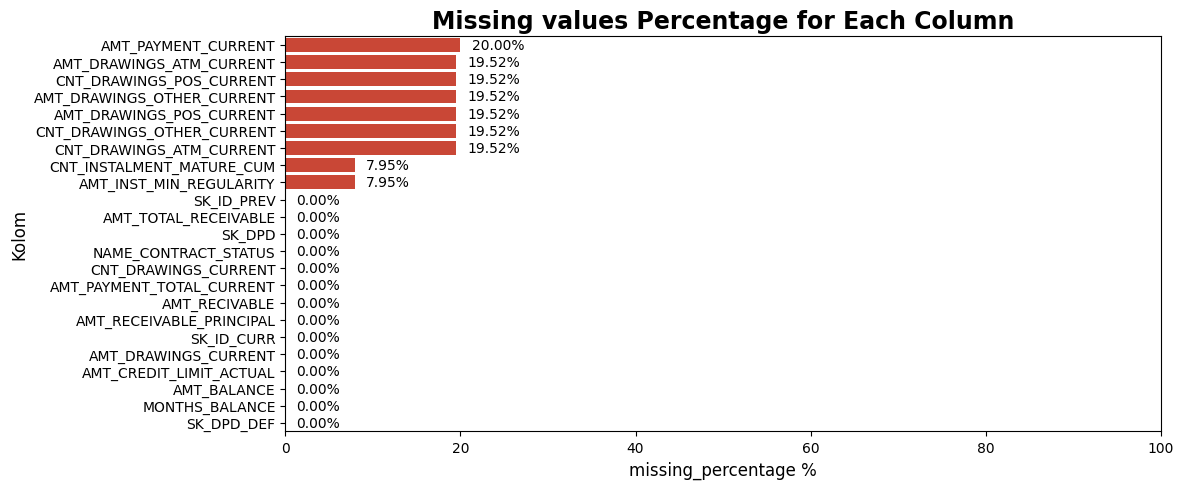

In [27]:
plot_missing_percentage(ccb)

## POS CASH balance

In [41]:
pc_balance = pd.read_csv('.././data/POS_CASH_balance.csv')
display(pc_balance.sample(10))
print(pc_balance.info())

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1718758,1390896,354925,-16,18.0,8.0,Active,17,0
8092736,1208859,215336,-17,12.0,12.0,Active,0,0
8878556,2058498,280306,-29,12.0,12.0,Active,0,0
9786041,1609327,190274,-52,10.0,2.0,Active,0,0
6731610,2384545,340888,-27,12.0,2.0,Active,0,0
272098,1737043,316254,-14,48.0,31.0,Active,0,0
6379418,1845335,197966,-4,12.0,0.0,Completed,0,0
5719560,1880686,310502,-46,12.0,11.0,Active,0,0
507422,2309521,417166,-41,4.0,0.0,Completed,0,0
7063400,2683345,177836,-15,12.0,5.0,Active,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


## Previous Application

In [34]:
prev = pd.read_csv('.././data/previous_application.csv')
prev_cred = pd.merge(prev, ccb, on='SK_ID_PREV', how='inner')

In [36]:
prev_cred.shape

(2757496, 59)

In [33]:
prev_cred.shape

(4334775, 59)

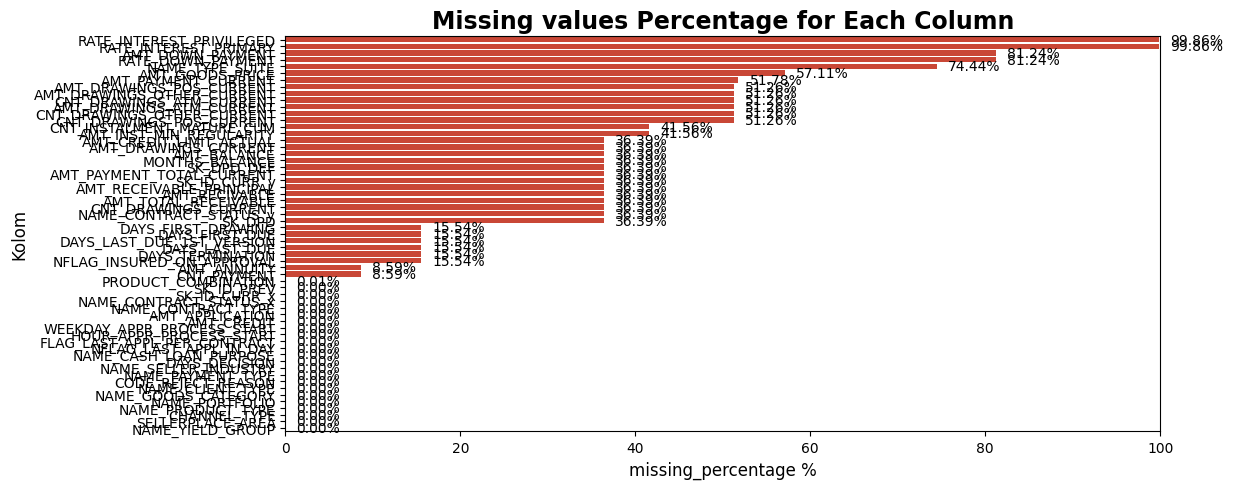

In [32]:
plot_missing_percentage(prev_cred)